In [1]:
%matplotlib inline
import os
import nltk
import random
import numpy as np
import pandas as pd
import re
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import json
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
data = []
for sermon in os.listdir('../sermons/preachingtoday'):
    f=open('../sermons/preachingtoday/'+ sermon, 'rb')
    contents =f.read()
    contents = json.loads(contents)
    data.append(contents["text"])
with open('embeddings.pkl', 'rb') as handle:
    word_embeddings = pickle.load(handle)
doc_embeddings = []

In [4]:
def get_embeddings(clean_doc):
    #clean_doc = pd.Series(doc).str.replace("[^a-zA-Z0-9:]", " ")
    #clean_doc = [s.lower() for s in clean_doc]
    #clean_doc = [remove_stopwords(r.split(' ')) for r in clean_doc]
    #print(clean_doc)
    doc_vectors = []
    for i in clean_doc:
        #print(i)
        if len(i) != 0:
            v = sum([word_embeddings.get(w, np.zeros((128,))) for w in i.split()])/(len(i.split())+0.001)
        else:
            v = np.zeros((128,))
        doc_vectors.append(v)
    return doc_vectors

def remove_stopwords(sen):
    punctuation = ['.', '..', '...', '?', ':', '!']
    stop_words = stopwords.words('english')
    sen_new = " ".join([i for i in sen if i not in stop_words and i not in punctuation])
    return sen_new
def remove_symbols(doc):
    cleaned_doc = []
    stop_words = stopwords.words('english')
    punctuation = ['.', '..', '...', '?', ':', '!', ',', '\'', ';', '``']
    for word in doc:
        if word not in punctuation and word not in stop_words: 
            cleaned_doc.append( re.sub(r"[,.\'?!]", "", word))
    return cleaned_doc
def clean_doc(doc):
    words = re.sub(r'\'', '', doc).lower()
    words = word_tokenize(re.sub(r'\.(?=[^ \W\d])', '. ', words))
    words = remove_symbols(words)
    return words

In [5]:
#doc_embeddings+= get_embeddings(doc[0])
for doc in data:
    cleaned = clean_doc(doc)
    doc_embeddings.append(get_embeddings(cleaned))

In [7]:
doc_embeddings[0]

[array([-0.06807987, -0.07252496,  0.05237272,  0.02747815, -0.04956352,
        -0.00944349,  0.06345037, -0.0991631 , -0.09526952,  0.09321871,
         0.06965804, -0.11321717, -0.01153562,  0.04419193,  0.10404785,
        -0.03538478,  0.01170355, -0.00306062, -0.04423871,  0.01162479,
        -0.059387  ,  0.03873673,  0.034104  , -0.1613945 ,  0.00337434,
         0.15118884,  0.04172028, -0.0198095 , -0.03427272,  0.00040463,
         0.08775563, -0.00098275,  0.06660903,  0.06589556, -0.0009716 ,
         0.17167714,  0.01407664, -0.11313974, -0.06718418,  0.09411726,
         0.15596494,  0.06015256,  0.03511349,  0.03690001, -0.05685558,
         0.10575343,  0.003497  , -0.01535412,  0.06034499,  0.08390722,
        -0.14696567,  0.11443392,  0.06477559, -0.04641585, -0.00238219,
        -0.03478543, -0.03512649,  0.05033507,  0.04057717,  0.02326065,
        -0.06471053, -0.01997118,  0.02908897,  0.25964043,  0.04305355,
         0.13001832, -0.10819805,  0.06460433,  0.1

In [28]:
average_embeds = []
for embed in doc_embeddings:
    final_embed = np.zeros(128)
    for emb in embed:
        final_embed += emb
    average_embeds.append(final_embed/len(embed))

In [6]:
average_embeds = []
for embed in doc_embeddings:
    final_embed = []
    for emb in embed:
        final_embed.append(np.average(emb))
    average_embeds.append(np.array(final_embed))
average_embeds = np.array(average_embeds)

Take 500 random samples from each one and run on that

In [36]:
pca = PCA(n_components = 500)
reduced_embeds = []
for embed in doc_embeddings.reshape(-1,1): 
    reduced_embeds.append(pca.fit_transform(embed))

ValueError: n_components=500 must be between 0 and n_features=128 with svd_solver='full'

In [39]:
np.array(doc_embeddings[0]).reshape(1,-1).shape

(1, 608640)

In [26]:
reduced_embeds[0].shape

(1, 1)

In [26]:
kmeans = KMeans(n_clusters=10, random_state=0, max_iter=100).fit(average_embeds)
cluster_data = kmeans.transform(average_embeds)
X_embedded = TSNE(n_components=2).fit_transform(cluster_data)

ValueError: setting an array element with a sequence.

No handles with labels found to put in legend.


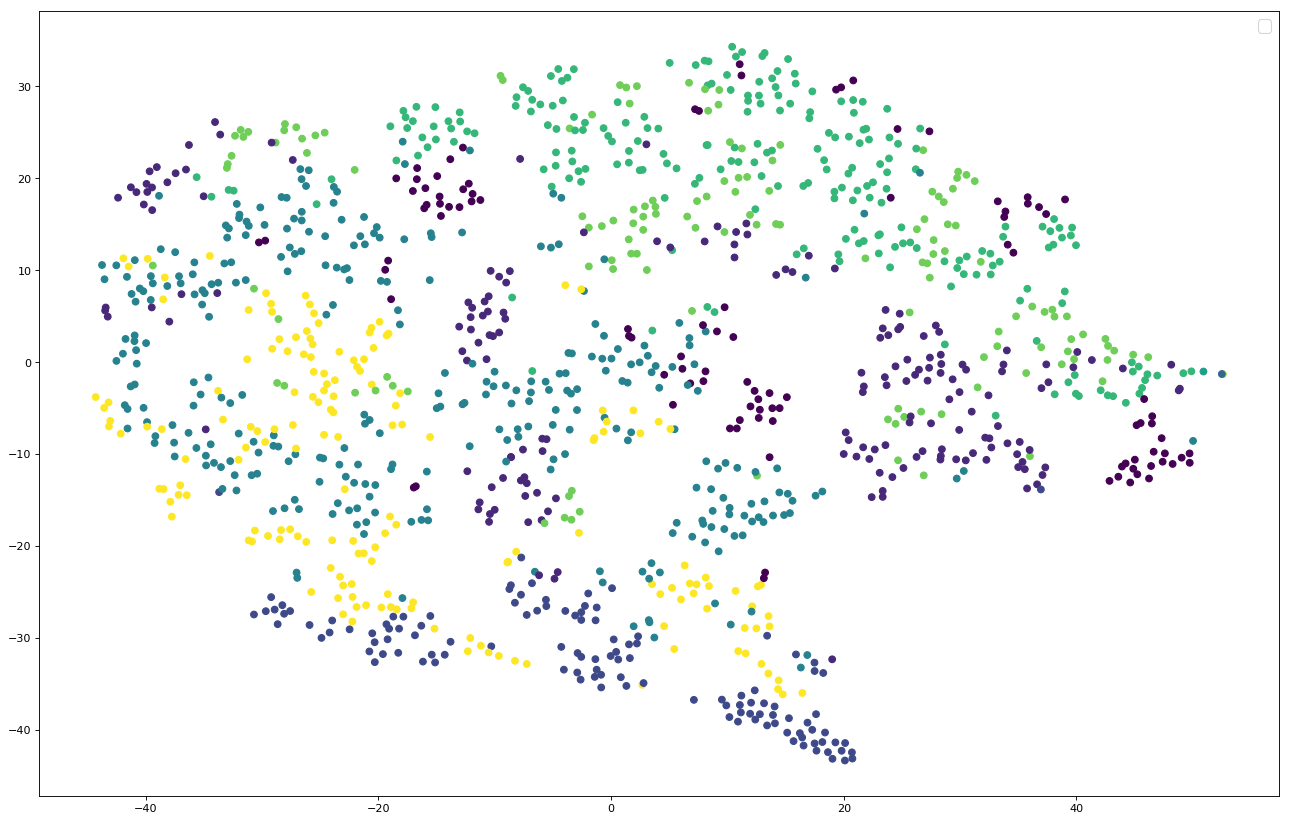

In [67]:
fig = plt.figure(figsize=(20, 13), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
ax1.scatter(X_embedded[:][:,0],X_embedded[:][:,1], c = kmeans.labels_)
plt.legend(prop={'size': 15})
plt.show()


In [68]:
vals = kmeans.labels_.tolist()
for i in range(20):
    print(i, vals.count(i))

0 101
1 181
2 121
3 1
4 309
5 1
6 230
7 139
8 1
9 169
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0


In [61]:
kmeans.labels_.tolist()

[12,
 13,
 13,
 12,
 9,
 6,
 1,
 2,
 14,
 14,
 19,
 1,
 4,
 9,
 4,
 15,
 18,
 12,
 6,
 3,
 9,
 19,
 9,
 12,
 9,
 13,
 9,
 10,
 13,
 1,
 6,
 0,
 4,
 18,
 18,
 14,
 7,
 9,
 13,
 10,
 14,
 19,
 7,
 6,
 1,
 4,
 13,
 6,
 13,
 9,
 15,
 13,
 4,
 15,
 13,
 15,
 19,
 9,
 12,
 15,
 1,
 6,
 14,
 3,
 18,
 4,
 6,
 1,
 19,
 4,
 14,
 0,
 19,
 14,
 14,
 19,
 2,
 14,
 9,
 14,
 5,
 15,
 15,
 1,
 19,
 11,
 15,
 9,
 2,
 6,
 13,
 19,
 14,
 0,
 2,
 12,
 1,
 11,
 9,
 14,
 13,
 3,
 7,
 4,
 15,
 3,
 1,
 10,
 12,
 12,
 4,
 1,
 14,
 19,
 19,
 3,
 9,
 18,
 4,
 13,
 9,
 19,
 1,
 4,
 13,
 9,
 15,
 6,
 19,
 1,
 15,
 13,
 13,
 6,
 11,
 14,
 13,
 15,
 19,
 2,
 4,
 9,
 13,
 11,
 11,
 4,
 7,
 6,
 6,
 6,
 15,
 1,
 6,
 11,
 19,
 1,
 14,
 19,
 4,
 9,
 3,
 10,
 18,
 2,
 15,
 12,
 4,
 13,
 6,
 0,
 4,
 14,
 14,
 14,
 14,
 13,
 1,
 13,
 6,
 7,
 3,
 11,
 1,
 15,
 11,
 14,
 15,
 13,
 0,
 13,
 1,
 13,
 9,
 9,
 1,
 10,
 10,
 13,
 4,
 9,
 11,
 15,
 9,
 19,
 1,
 2,
 7,
 12,
 1,
 13,
 6,
 4,
 13,
 3,
 4,
 9,
 13,
 19,
 13,
 15,
 10,
